## 1. Data Check

In [1]:
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.read_csv("./data/10.CreditCardDefaulPrediction/creditcard_default.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [3]:
df['income_type'].value_counts()

income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: count, dtype: int64

In [4]:
dic_cd =  {'Working': 'code1',
           'Commercial associate':'code2',
           'Pensioner': 'code3',  
           'State servant': 'code4',
           'Student': 'code5'}

# dic_cd_meta = {'code1' : 'Working',
#                'code2' : 'Commercial associate',
#                'code3' : 'Pensioner',  
#                'code4' : 'State servant',
#                'code5' : 'Student'}

In [5]:
dic_cd

{'Working': 'code1',
 'Commercial associate': 'code2',
 'Pensioner': 'code3',
 'State servant': 'code4',
 'Student': 'code5'}

In [6]:
dic_cd['Working']

'code1'

In [7]:
df['income_type'] = df['income_type'].apply(lambda x : dic_cd[x])
df.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,code2,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,code4,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [8]:
df['income_type'].value_counts()

income_type
code1    13645
code2     6202
code3     4449
code4     2154
code5        7
Name: count, dtype: int64

In [9]:
df.shape

(26457, 20)

In [10]:
# Brief Data overview
print(df.iloc[1,:]) # df의 두번째 행의 모든것을 

index                                        1
gender                                       F
car                                          N
reality                                      Y
child_num                                    1
income_total                          247500.0
income_type                              code2
edu_type         Secondary / secondary special
family_type                     Civil marriage
house_type                   House / apartment
DAYS_BIRTH                              -11380
DAYS_EMPLOYED                            -1540
FLAG_MOBIL                                   1
work_phone                                   0
phone                                        0
email                                        1
occyp_type                            Laborers
family_size                                3.0
begin_month                               -5.0
credit                                     1.0
Name: 1, dtype: object


In [11]:
# Check data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [12]:
# Null Value
print(df.isnull().sum())

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64


In [13]:
# calculate the % of Null and sort
df_null = pd.DataFrame(df.isnull().sum(), columns=['null'])
df_null['null_ratio'] = df_null['null'] / len(df)
df_null.sort_values(by=['null_ratio'], ascending=False)

,null,null_ratio
occyp_type,8171,0.308841
index,0,0.000000
gender,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000
DAYS_EMPLOYED,0,0.000000


In [14]:
# check if null is over 70%
list(df_null[df_null['null_ratio']>0.70].index)

[]

In [15]:
df['occyp_type'] = df['occyp_type'].fillna('etc')
df.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [16]:
df['occyp_type'].value_counts()

occyp_type
etc                      8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: count, dtype: int64

In [17]:
# zero ratio
# will delete if ratio of 0 is over 90%
list_of_df = []

for i in df.columns:
    loof_df = pd.DataFrame({'val' : [i],
              'zero_cnt': df[df[i] == 0].count()[0]})
    list_of_df.append(loof_df)
    
df_merge = pd.concat(list_of_df).reset_index(drop=True)
df_merge['zero_ratio']= df_merge['zero_cnt']/len(df)
df_merge.sort_values(by=['zero_ratio'], ascending = False)

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/3468072939.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'zero_cnt': df[df[i] == 0].count()[0]})
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/3468072939.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'zero_cnt': df[df[i] == 0].count()[0]})
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/3468072939.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

,val,zero_cnt,zero_ratio
15,email,24042,0.908720
13,work_phone,20511,0.775258
14,phone,18672,0.705749
4,child_num,18340,0.693200
19,credit,3222,0.121783
18,begin_month,231,0.008731
0,index,1,0.000038
7,edu_type,0,0.000000
8,family_type,0,0.000000
9,house_type,0,0.000000


In [18]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,code2,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,code4,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [19]:
#meta data

dic_cd_meta = {'code1' : 'Working',
               'code2' : 'Commercial associate',
               'code3' : 'Pensioner',  
               'code4' : 'State servant',
               'code5' : 'Student'}

df['income_type'] = df['income_type'].apply(lambda x: dic_cd_meta[x])
df['income_type'].head()

0    Commercial associate
1    Commercial associate
2                 Working
3    Commercial associate
4           State servant
Name: income_type, dtype: object

In [20]:
df['income_type'].value_counts()

income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: count, dtype: int64

In [21]:
# target column
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64

credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64


In [22]:
import numpy as np
import pandas as pd
numerical_list = []
categorical_list = []

for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_list.append(i)
    else :
        numerical_list.append(i)
        
print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']
categorical_list: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


In [23]:
for i in numerical_list:
    print(i,":",df[i].nunique())

index : 26457
child_num : 9
income_total : 249
DAYS_BIRTH : 6621
DAYS_EMPLOYED : 3470
FLAG_MOBIL : 1
work_phone : 2
phone : 2
email : 2
family_size : 10
begin_month : 61
credit : 3


In [24]:
# numerical_list vlaue unique 
list_of_df = []

for i in numerical_list :
    loof_df = pd.DataFrame({'val':[i],
                            'nunique': df[i].nunique()})
    list_of_df.append(loof_df)

df_merge = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending=True)

,val,nunique
5,FLAG_MOBIL,1
6,work_phone,2
7,phone,2
8,email,2
11,credit,3
1,child_num,9
9,family_size,10
10,begin_month,61
2,income_total,249
4,DAYS_EMPLOYED,3470


In [25]:
# categorical_list value unique
list_of_df = []

for i in categorical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
7,occyp_type,19
6,house_type,6
3,income_type,5
4,edu_type,5
5,family_type,5
0,gender,2
1,car,2
2,reality,2


In [26]:
# change numerical list to categorical list
change_list = ['credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']

for i in change_list:
    numerical_list.remove(i)
    
for i in change_list:
    categorical_list.append(i)
    
print("numerical_list", numerical_list)
print("categorical_list", categorical_list)

numerical_list ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']
categorical_list ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']


## Feature Engineering

#### 1. Target Label
#### 2. Target Ratio
#### 3. Data imbalence check

In [27]:
# target column
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64

credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64


In [28]:
# 'credit' = 0 means 'good credit'
# 'credit' = 2 means 'worst credit'

df['credit'] = np.where(df['credit'] == 2,1,0) # 만약 2 면 1, else 0
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

credit
1    16968
0     9489
Name: count, dtype: int64

credit
1    0.641343
0    0.358657
Name: proportion, dtype: float64


In [29]:
categorical_list

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'credit',
 'work_phone',
 'phone',
 'email',
 'FLAG_MOBIL']

In [30]:
eda_df = df.groupby('occyp_type')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
# t_cnt = sum of credit = 1 ; number of bad credit people
eda_df['t_ratio'] = eda_df['t_cnt']/eda_df['cnt']
eda_df.sort_values(by=['t_ratio'], ascending=False)

,occyp_type,cnt,t_cnt,t_ratio
5,HR staff,62,51,0.822581
16,Security staff,424,297,0.700472
13,Realty agents,63,44,0.698413
11,Medicine staff,864,590,0.682870
1,Cleaning staff,403,270,0.669975
9,Low-skill Laborers,127,84,0.661417
10,Managers,2167,1429,0.659437
4,Drivers,1575,1030,0.653968
18,etc,8171,5266,0.644474
3,Core staff,2646,1677,0.633787


### Information Value

IV는 데이터분석에서 변수의 예측력을 측정하기 위해 사용하는 지표. 

- 주로 이진 분류 문제에서 Feature가 Target과 얼마나 강하게 관련 있는지 평가. 

- IV는 각 범주(category)에서 좋은(good) 클래스와 나쁜(bad) 클래스의 비율 차이를 계산하여, 특정 변수가 목표(target) 변수의 예측력을 얼마나 기여하는지를 정량적으로 나타냄

IV의 계산 과정
1. 변수의 범주화(Binning):
    - 연속형 변수(예: 나이, 소득)라면 적절한 범위로 나누어 범주화(binning)합니다.
    - 범주형 변수라면 고유 값을 기준으로 각 값을 하나의 범주로 봅니다.
2. 각 범주의 good과 bad 개수 계산:
    - 종속 변수(Target)가 이진 변수(예: 0=연체 X, 1=연체 O)라고 가정합니다.
    - 각 범주에서 good(예: 0)의 수와 bad(예: 1)의 수를 계산합니다.
3. 각 법주의 비율 계산 :
    - Good % = 범주의 good 수 / 전체 good 수
    - Bad % = 범주의 bad 수 / 전체 bad 수
4. Weight of Evidence (WOE, 증거 가중치) 계산 : 
    - ln자연로그
    - Good% 또는 Bad%가 0이면 계산이 불가능하므로, 일반적으로 0 대신 작은 값을 대체합니다(예: 0.0001).
5. IV 값 계산
    - IV는 모든 범주의 WoE와 Good% - Bad%의 곱을 더한 값입니다


예를들어 age binning
전체 Good 수 : 500 / 전체 Bad 수 : 200
1. 20's Good : 200 Bad : 50 /
 Good % : 0.4 Bad % : 0.25
2. 30's Good : 200 Bad : 100 / Good % : 0.4 Bad % : 0.5
3. 40's Good : 100 Bad : 50 / Good % : 0.4 Bad % : 0.25

WOE계산
- Weight of Evidence (WoE) 계산에서 자연로그(ln)를 사용하는 이유는 데이터의 **Good%**와 Bad% 비율 간의 비율 차이를 효과적으로 비교하고, 이를 모델링이나 변수의 예측력 평가에 적합한 형태로 변환하기 위해서입니다.
- 20's = ln(0.4/0.25) = 0.470

IV Score 
- (Good% - Bad%) × WoE
- 20's : (0.40-.0.25) x 0.470 = 0.071


이렇게 모든 bin들의 IV score 합산
- IV=0.071+0.022+0.011=0.104
- 약한 예측력. 0.5 이상이어야함. 


코드에서 사용된 OptimalBinning 라이브러리는 데이터의 최적 구간화(binning) 작업을 수행하는 강력한 도구입니다. 이 라이브러리는 특히 이진 분류 문제에서, 변수의 **Information Value (IV)**를 계산하는 데 자주 사용됩니다. 여기서 구간화(binning)는 주어진 데이터 값을 몇 개의 범주(bin)로 나누는 과정을 말합니다.

코드에서의 Binning 과정
1. OptimalBinning의 역할
OptimalBinning은 **연속형 변수(numerical data)**를 목표 변수(target variable)와의 관계를 기준으로 최적의 구간으로 나눕니다.
여기서 목표 변수는 **y = df.credit**이고, 이는 대개 이진 값(예: 0=Good, 1=Bad)을 가집니다.
최적 구간화의 목적:
Good/Bad 분포를 기준으로, 정보 손실을 최소화하면서 구간(bin)을 나눕니다.
각 구간에서 IV를 계산하여 변수의 예측력을 평가합니다.
2. max_n_prebins=3
**max_n_prebins**는 **사전 구간(prebins)**의 최대 개수를 지정합니다.
사전 구간은 데이터를 미리 몇 개의 큰 구간으로 나눈 뒤, 이를 기반으로 최적화를 수행합니다.
**max_n_prebins=3**으로 설정했으므로, 변수를 최대 3개의 구간으로 나누게 됩니다.
3. 구간화 기준
구간화 과정은 다음과 같은 알고리즘을 따릅니다:
**Good/Bad 비율(event rate)**의 차이가 가장 큰 지점(스플릿)을 찾아 구간을 나눕니다.
구간을 나눈 뒤, 각 구간에 대해 Good%와 Bad%를 계산하고, WoE 및 IV를 구합니다.
이러한 과정을 반복해, 구간 개수가 max_n_prebins 이하가 될 때까지 최적화를 수행합니다.
최적화 기준은 IV 값을 최대화하거나, **WoE 값의 단조성(monotonicity)**을 유지하도록 설정됩니다.

In [31]:
# ▶ numeric
# !pip install optbinning
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list :
  variable = i
  x = df[variable].values
  y = df.credit
  # max_n_prebins
  optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
  optb.fit(x, y)
  # print("split points : ", optb.splits)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)


# binning_table.plot(metric="event_rate")

(CVXPY) Jan 17 12:46:31 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 17 12:46:31 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


,val,IV
6,begin_month,1.006220
3,DAYS_BIRTH,0.011866
4,DAYS_EMPLOYED,0.007658
2,income_total,0.002783
5,family_size,0.001626
1,child_num,0.000981
0,index,0.000894


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -8.50)",21737,0.821597,6557,15180,0.698348,-0.25825,0.052583,0.006555
1,"[-8.50, -3.50)",3003,0.113505,1230,1773,0.590410,0.215537,0.005417,0.000676
2,"[-3.50, inf)",1717,0.064898,1702,15,0.008736,5.312705,0.948220,0.059678
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,1.006220,0.066909


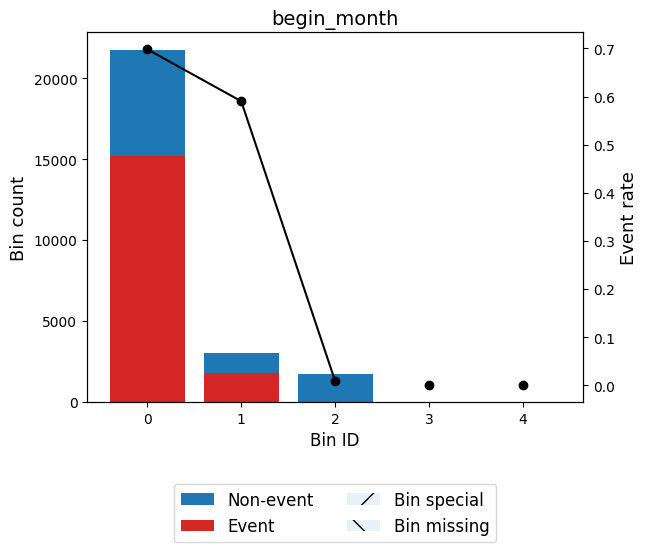

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])

# ▶ numeric one col plotting 
variable = 'begin_month' # 확인
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)
# print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")
#0 이 연체 확율이 많고
# 값이 0 이면 이번달 발급, 마이너스이면 신용카드 이전에 발급
# 최근 발급한 사람들은 거의 없음 연체자. 

count    26457.000000
mean       -26.123294
std         16.559550
min        -60.000000
25%        -39.000000
50%        -24.000000
75%        -12.000000
max          0.000000
Name: begin_month, dtype: float64


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/3148137765.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['begin_month']);


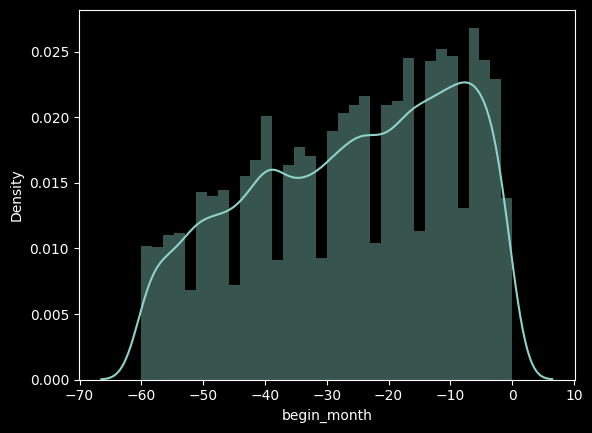

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['begin_month'].describe())
sns.distplot(df['begin_month']);

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -13481.50)",17769,0.671618,6112,11657,0.656030,-0.064457,0.002764,0.000345
1,"[-13481.50, -9971.50)",7138,0.269796,2692,4446,0.622864,0.079476,0.001723,0.000215
2,"[-9971.50, inf)",1550,0.058586,685,865,0.558065,0.347885,0.007379,0.000918
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,0.011866,0.001478


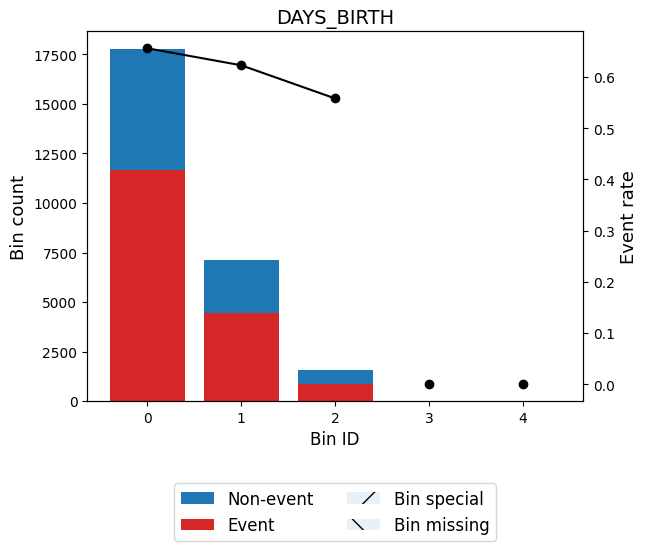

In [34]:
plt.style.use(['default'])
# ▶ numeric one col plotting 
variable = 'DAYS_BIRTH'
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)
# print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

count    26457.000000
mean    -15958.053899
std       4201.589022
min     -25152.000000
25%     -19431.000000
50%     -15547.000000
75%     -12446.000000
max      -7705.000000
Name: DAYS_BIRTH, dtype: float64


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/2502373225.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS_BIRTH']);


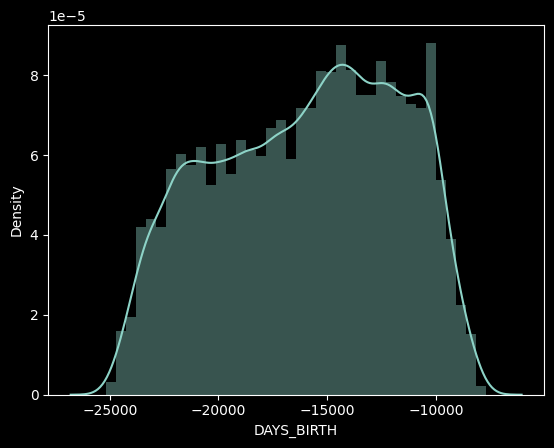

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['DAYS_BIRTH'].describe())
sns.distplot(df['DAYS_BIRTH']);

In [36]:
x_transform_bins = optb.transform(df['DAYS_BIRTH'], metric="bins")
df_bin = pd.DataFrame(df['credit'])
df_bin['bin'] = x_transform_bins
df_bin.head()

,credit,bin
0,0,"(-inf, -13481.50)"
1,0,"[-13481.50, -9971.50)"
2,1,"(-inf, -13481.50)"
3,0,"(-inf, -13481.50)"
4,1,"(-inf, -13481.50)"


In [37]:
eda_df = df_bin.groupby('bin')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df

,bin,cnt,t_cnt,t_ratio
0,"(-inf, -13481.50)",17769,11657,0.656030
1,"[-13481.50, -9971.50)",7138,4446,0.622864
2,"[-9971.50, inf)",1550,865,0.558065


### Categorical Features

In [38]:
df[categorical_list].head()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,credit,work_phone,phone,email,FLAG_MOBIL
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,etc,0,0,0,0,1
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers,0,0,0,1,1
2,M,Y,Y,Working,Higher education,Married,House / apartment,Managers,1,0,1,0,1
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,0,0,1,0,1
4,F,Y,Y,State servant,Higher education,Married,House / apartment,Managers,1,0,0,0,1


<Figure size 3000x3000 with 0 Axes>

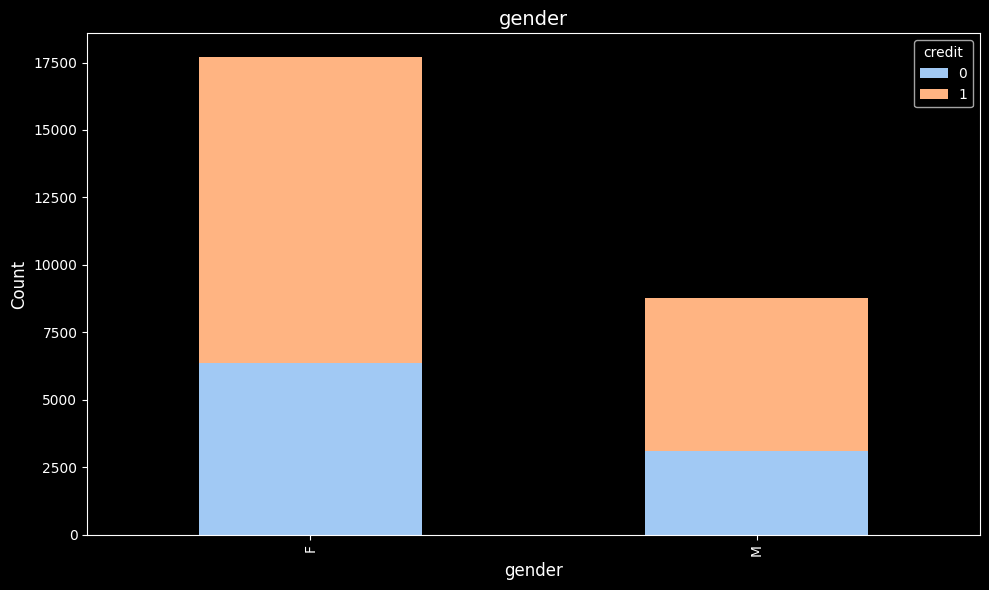

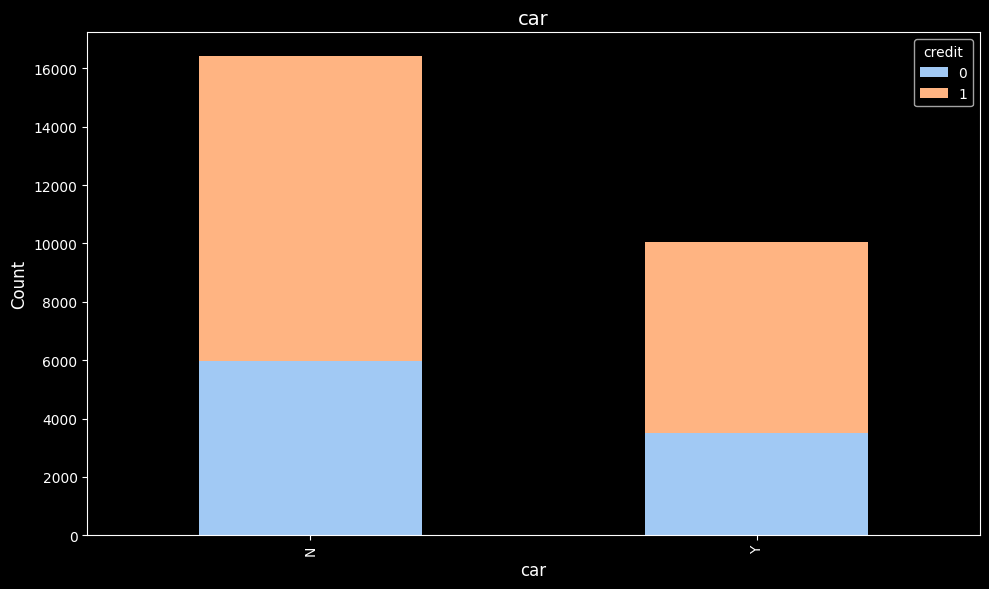

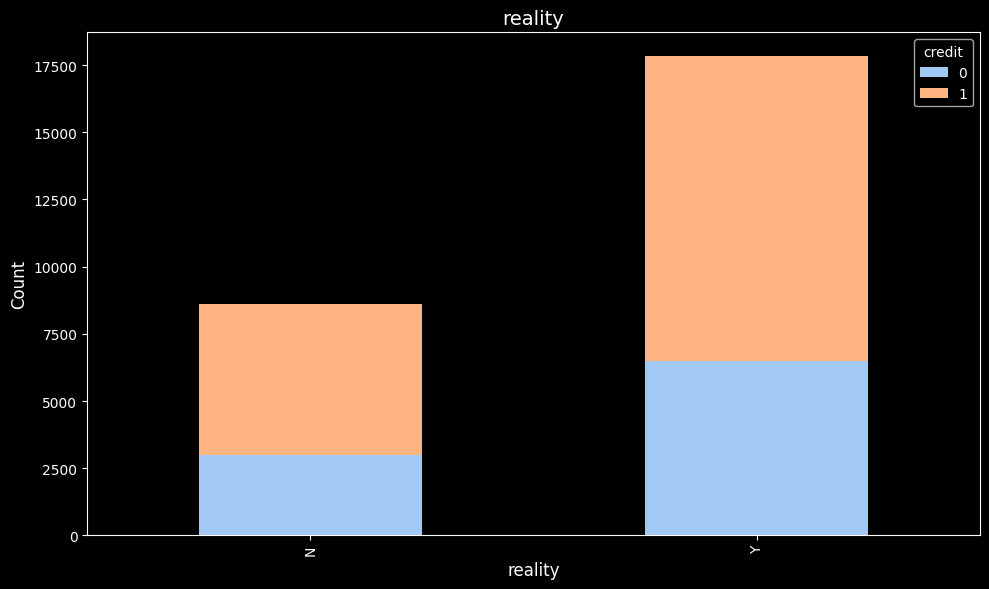

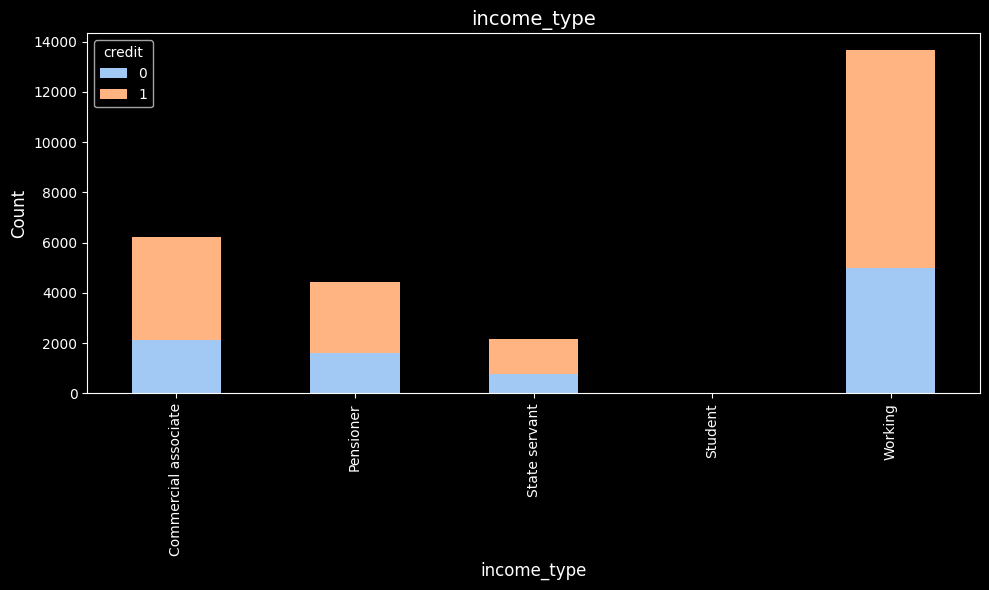

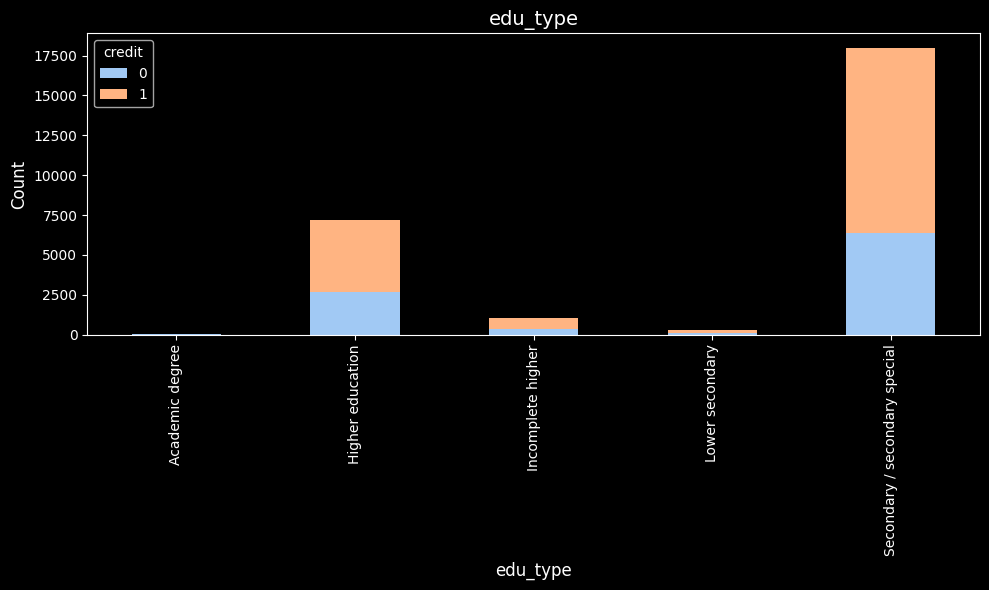

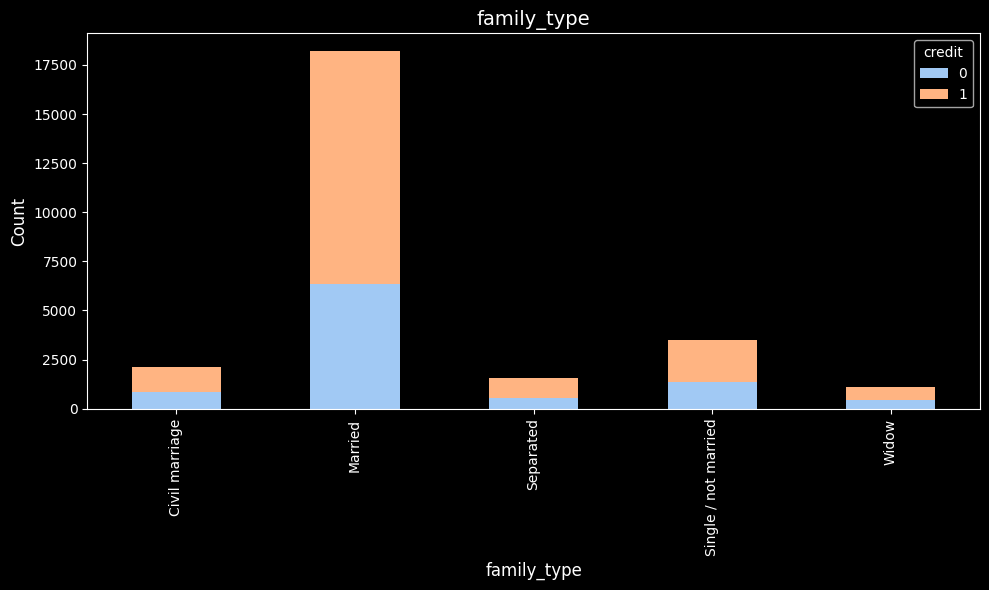

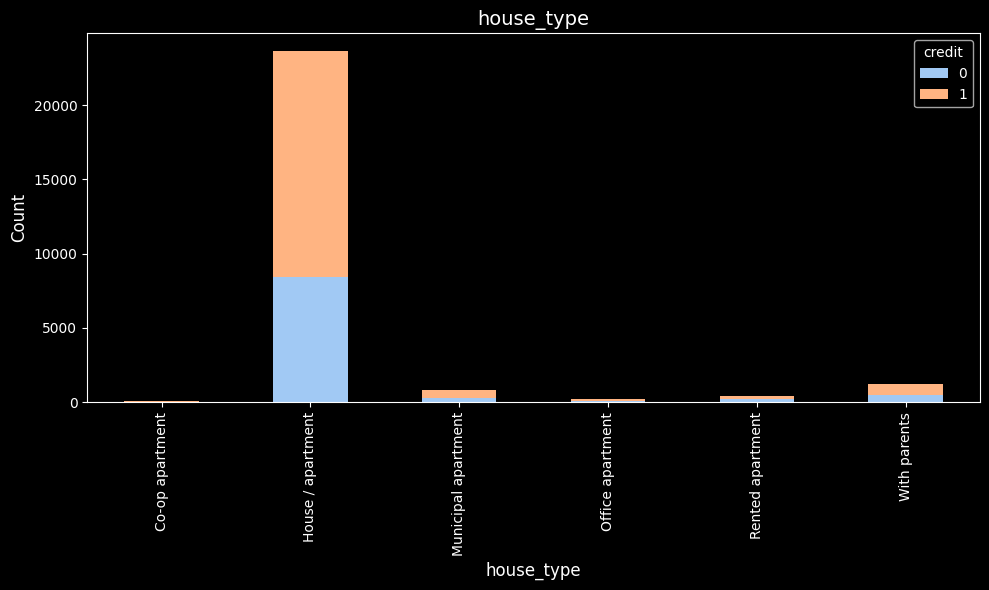

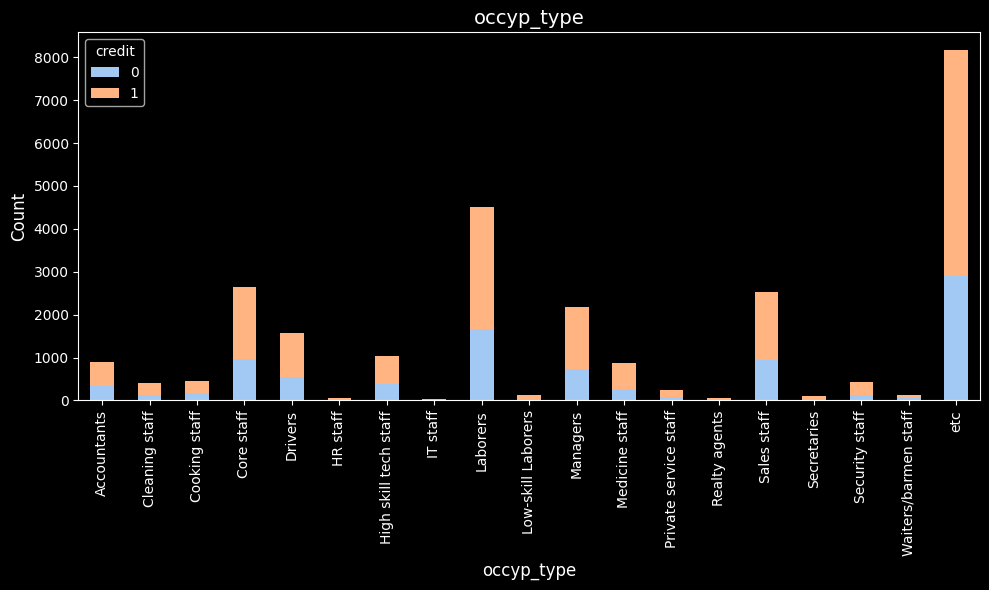

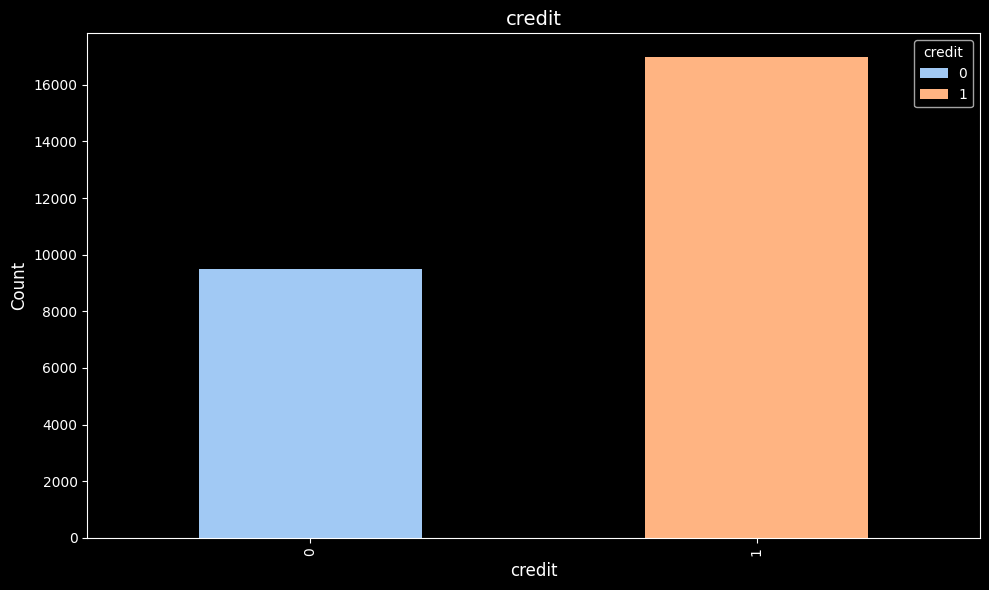

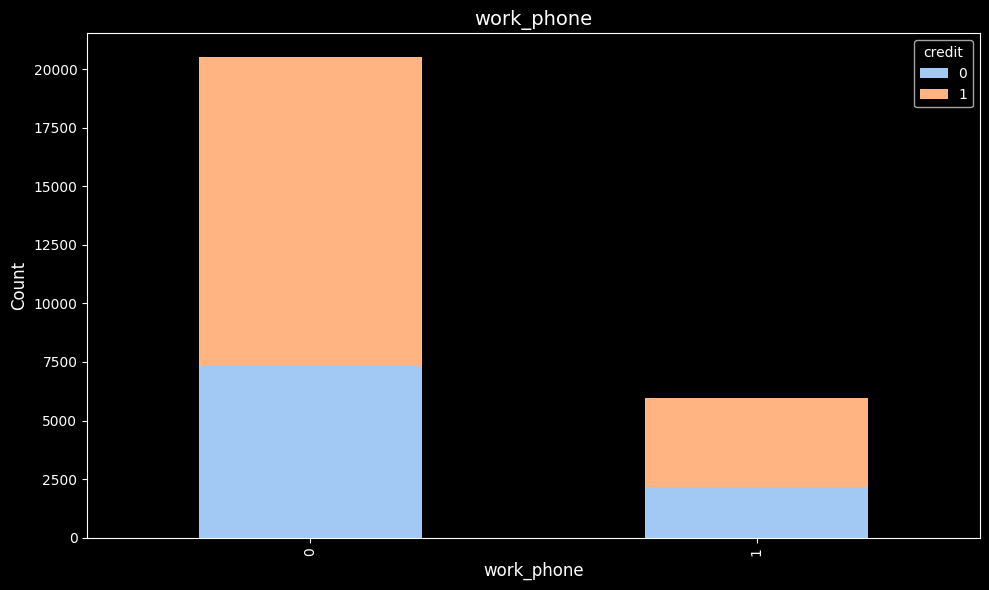

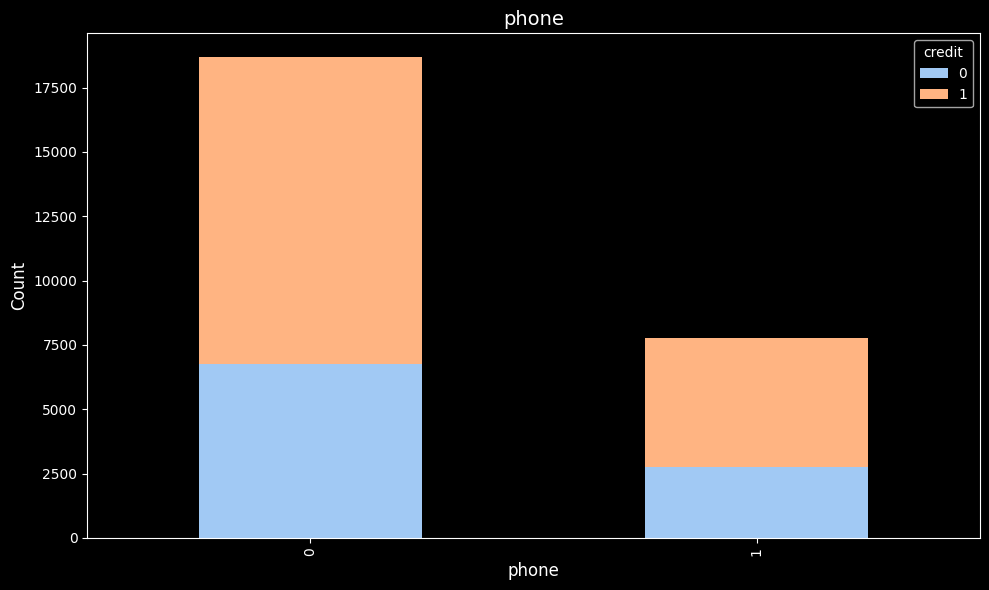

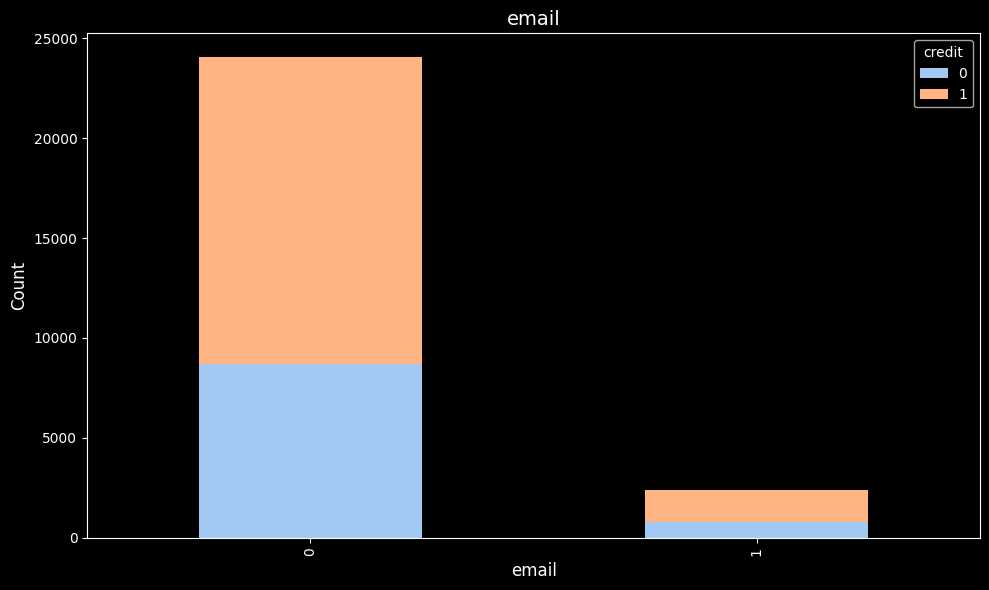

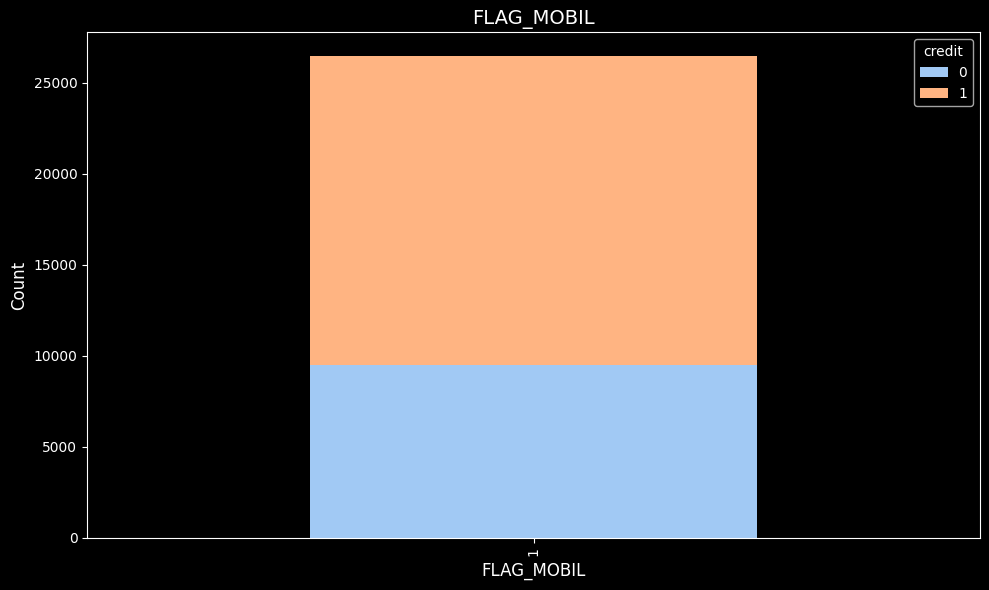

In [39]:
# Set a light color palette for the plots
sns.set_palette("pastel")

plt.figure(figsize=(30, 30))
for column_name in categorical_list:
    if column_name in df.columns and "credit" in df.columns:
        grouped_data = df.groupby([column_name, "credit"]).size().unstack()
        grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))
        plt.title(column_name, fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.tight_layout()
    else:
        print(f"Column '{column_name}' or 'credit' is missing. Skipping.")
plt.show()

split points :  [array(['Waiters/barmen staff', 'IT staff', 'Secretaries', 'Accountants',
       'High skill tech staff'], dtype=object), array(['Sales staff'], dtype=object), array(['Private service staff', 'Laborers'], dtype=object), array(['Cooking staff', 'Core staff'], dtype=object), array(['etc'], dtype=object), array(['Drivers'], dtype=object), array(['Managers', 'Low-skill Laborers', 'Cleaning staff'], dtype=object), array(['Medicine staff', 'Realty agents', 'Security staff', 'HR staff'],
      dtype=object)]


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Waiters/barmen staff, IT staff, Secretaries, ...",2204,0.083305,856,1348,0.611615,0.127089,0.001368,0.000171
1,[Sales staff],2539,0.095967,943,1596,0.628594,0.055006,0.000293,0.000037
2,"[Private service staff, Laborers]",4755,0.179726,1758,2997,0.630284,0.047761,0.000413,0.000052
3,"[Cooking staff, Core staff]",3103,0.117285,1137,1966,0.633580,0.033588,0.000133,0.000017
4,[etc],8171,0.308841,2905,5266,0.644474,-0.013642,0.000057,0.000007
5,[Drivers],1575,0.059531,545,1030,0.653968,-0.055332,0.000181,0.000023
6,"[Managers, Low-skill Laborers, Cleaning staff]",2697,0.101939,914,1783,0.661105,-0.087026,0.000762,0.000095
7,"[Medicine staff, Realty agents, Security staff...",1413,0.053407,431,982,0.694975,-0.242287,0.003017,0.000376
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


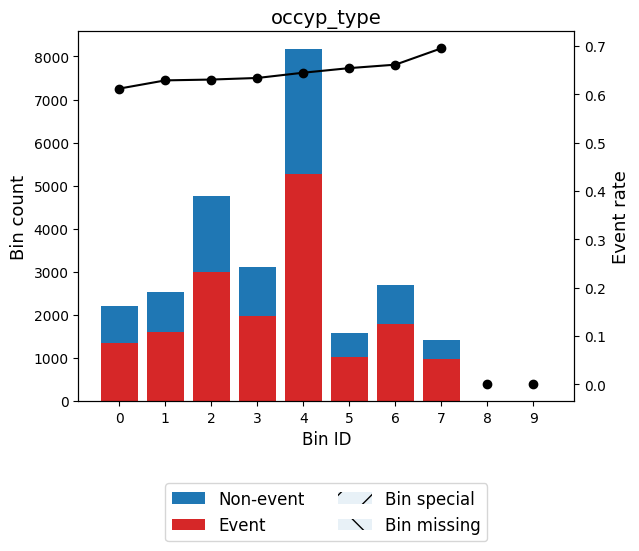

In [40]:
plt.style.use(['default'])

# ▶ Categorical one col plotting 
variable = 'occyp_type'
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")
optb.fit(x, y)
print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

In [41]:
# ▶ numeric
# !pip install optbinning
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list :
  variable = i
  x = df[variable].values
  y = df.credit
  # max_n_prebins
  optb = OptimalBinning(name=variable, dtype="categorical")
  optb.fit(x, y)
  # print("split points : ", optb.splits)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)


# binning_table.plot(metric="event_rate")

,val,IV
7,occyp_type,0.006224
5,family_type,0.004767
3,income_type,0.001783
6,house_type,0.001601
4,edu_type,0.001151
2,reality,0.001116
11,email,0.000967
1,car,0.000858
10,phone,0.000441
9,work_phone,0.000058


In [42]:
#### Modeling

from sklearn.model_selection import train_test_split

X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis=1)
Y = df['credit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [43]:
df[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       26457 non-null  object
 1   car          26457 non-null  object
 2   reality      26457 non-null  object
 3   income_type  26457 non-null  object
 4   edu_type     26457 non-null  object
 5   family_type  26457 non-null  object
 6   house_type   26457 non-null  object
 7   occyp_type   26457 non-null  object
 8   credit       26457 non-null  int64 
 9   work_phone   26457 non-null  int64 
 10  phone        26457 non-null  int64 
 11  email        26457 non-null  int64 
 12  FLAG_MOBIL   26457 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 2.6+ MB


In [44]:
categorical_list.remove('credit')
categorical_list.remove('work_phone')
categorical_list.remove('phone')
categorical_list.remove('email')
categorical_list.remove('FLAG_MOBIL')

In [45]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
for col in categorical_list :
  encoder = OneHotEncoder()
  encoder.fit(x_train[[col]])
  onehot_train = pd.DataFrame(encoder.transform(x_train[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_train.index)
  onehot_test = pd.DataFrame(encoder.transform(x_test[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_test.index)
  # 기존 Col은 삭제
  x_train = pd.concat([x_train,onehot_train], axis = 1).drop(columns = [col])
  x_test = pd.concat([x_test,onehot_test], axis = 1).drop(columns = [col])

In [46]:
x_train.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
10232,2,225000.0,-10937,-1539,0,0,0,4.0,-41.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14594,0,202500.0,-8353,-1081,1,0,1,2.0,-13.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,1,135000.0,-13108,-1299,0,0,0,3.0,-25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12841,0,135000.0,-21374,365243,0,0,0,2.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7881,0,112500.0,-20775,365243,0,0,0,2.0,-12.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
x_test.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
23860,0,211500.0,-17249,-1661,1,1,0,2.0,-43.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26267,0,292500.0,-13434,-3515,0,0,1,1.0,-21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13972,0,90000.0,-19042,-3319,0,0,0,1.0,-15.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16839,1,90000.0,-9087,-1051,0,0,0,3.0,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26452,2,225000.0,-12079,-1984,0,0,0,4.0,-2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [49]:
# model training
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_sc, y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import classification_report
# predict
y_pred_train = LR.predict(x_train_sc)
y_pred_test = LR.predict(x_test_sc)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

# Precision : 모델이 양성으로 예측한것들 중에서 맞은 것 (잘못된 알람; 암이 아닌데 암판정)
# 0 이라고 예측한것 중에 71%만 맞음
# 1 이라고 예측한것 중에 66%만 맞음

# Recall : 실제 양성인것들중에서 모델이 정확히 예측한 비율 (실제 암인데 놓치는 경우)
# 실제 0 인 애들을 모델은 12%만 맞음
# 실제 1 인 애들은 모델이 97%나 맞음. 

# f1 : 조화평균
# 0 : 20% 성능 낮음
# 1 : 79% 성능 괜찮음

# support : 0:1 데이터 갯수


              precision    recall  f1-score   support

           0       0.71      0.12      0.20      6642
           1       0.66      0.97      0.79     11877

    accuracy                           0.67     18519
   macro avg       0.68      0.55      0.50     18519
weighted avg       0.68      0.67      0.58     18519

              precision    recall  f1-score   support

           0       0.69      0.12      0.21      2847
           1       0.66      0.97      0.79      5091

    accuracy                           0.67      7938
   macro avg       0.68      0.55      0.50      7938
weighted avg       0.67      0.67      0.58      7938



- 클래스 0의 Recall이 매우 낮습니다 (12%). 즉, 모델이 실제 0 데이터를 잘 잡아내지 못하고 있습니다.
- 클래스 1의 Precision/Recall은 괜찮은 편입니다.
- 데이터 불균형이 성능에 영향을 미치는 것 같습니다. 클래스 0에 대한 성능 개선이 필요합니다:
- 클래스 균형 조정(SMOTE, 언더샘플링 등).
- 다른 모델 또는 하이퍼파라미터 튜닝 시도.
- 클래스 0에 대한 Recall/F1-Score를 개선하는 데 집중.

In [51]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = LR.predict_proba(x_train_sc)[:, 1] 
y_pred_test_proba = LR.predict_proba(x_test_sc)[:, 1] 
#  [:, 1]을 사용하면 양성 클래스에 해당하는 확률만 추출하여 다음과 같은 배열을 얻음

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.6198062028799308
roc_score_test : 0.6195804327519441


- roc_auc_score는 양성 클래스에 대한 예측 점수를 기준으로 계산됩니다.
- predict_proba()의 결과는 모든 클래스(음성/양성)에 대한 확률을 반환하므로, 양성 클래스 확률을 선택해야 정확히 계산할 수 있습니다.

In [52]:
df_comparison = pd.DataFrame(columns=['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test'])
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test


In [54]:
import sklearn.metrics as metrics
lr_re = pd.DataFrame({ 
    'model' : ['LR'],
    'f1_train' :  [metrics.f1_score(y_train, y_pred_train)],
    'f1_test' : [metrics.f1_score(y_test, y_pred_test)],
    'AUC_train' : [roc_auc_score(y_train, y_pred_train_proba)],
    'AUC_test' : [roc_auc_score(y_test, y_pred_test_proba)]
})

# pd.concat을 사용하여 DataFrame 결합
df_comparison = pd.concat([df_comparison, lr_re], ignore_index=True)
df_comparison


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_10702/1276855037.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_comparison = pd.concat([df_comparison, lr_re], ignore_index=True)


,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.61958


## Random Forest

In [57]:
from sklearn.model_selection import train_test_split
X = df.drop(['index', 'credit','FLAG_MOBIL'], axis=1)
Y = df['credit']
# 분류일때는 stratify 꼭 해줘야함
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [58]:
# 로지스틱에는 원핫인코딩을 쓰지만, 랜덤과 lgb는 라벨인코딩
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    encoder = LabelEncoder()
    encoder.fit(x_train[[col]])
    
    # 기존 Col 대체
    x_train[col] = encoder.transform(x_train[col]) 
    x_test[col] = encoder.transform(x_test[col])
    


/Users/chulwonchae/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chulwonchae/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chulwonchae/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chulwonchae/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataC

In [59]:
x_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
10232,1,1,0,2,225000.0,2,1,1,5,-10937,-1539,0,0,0,6,4.0,-41.0
14594,1,0,1,0,202500.0,0,4,1,1,-8353,-1081,1,0,1,3,2.0,-13.0
1685,0,1,1,1,135000.0,4,4,1,1,-13108,-1299,0,0,0,18,3.0,-25.0
12841,0,0,1,0,135000.0,1,4,1,1,-21374,365243,0,0,0,18,2.0,-1.0
7881,0,1,1,0,112500.0,1,4,1,1,-20775,365243,0,0,0,18,2.0,-12.0


In [60]:
x_test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
23860,0,0,0,0,211500.0,4,4,1,1,-17249,-1661,1,1,0,18,2.0,-43.0
26267,0,0,1,0,292500.0,4,4,3,1,-13434,-3515,0,0,1,18,1.0,-21.0
13972,0,0,1,0,90000.0,4,4,2,1,-19042,-3319,0,0,0,18,1.0,-15.0
16839,1,1,0,1,90000.0,4,4,1,5,-9087,-1051,0,0,0,8,3.0,-1.0
26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,0,0,0,3,4.0,-2.0


In [66]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
#rfc = RandomForestClassifier(max_depth=2)
rfc.fit(x_train, y_train)

# predict
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6642
           1       0.98      0.99      0.99     11877

    accuracy                           0.98     18519
   macro avg       0.98      0.98      0.98     18519
weighted avg       0.98      0.98      0.98     18519

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      2847
           1       0.76      0.86      0.80      5091

    accuracy                           0.73      7938
   macro avg       0.71      0.68      0.69      7938
weighted avg       0.73      0.73      0.72      7938



In [68]:
!pip install bayesian-optimization

# ▶ BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestClassifier(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc') # target
    return np.mean(scores)
    
    
def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 200),
                                                  'maxDepth': (2, 4)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10) 
    print(clfBO.res)

bayesOpt(x_train, y_train)

  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.6337    | 3.74      | 120.5     |
| 2         | 0.6253    | 2.459     | 197.2     |
| 3         | 0.6314    | 3.119     | 104.9     |
| 4         | 0.6234    | 2.569     | 178.6     |
| 5         | 0.6331    | 3.765     | 112.9     |
| 6         | 0.623     | 2.013     | 139.1     |
| 7         | 0.6342    | 3.996     | 119.4     |
| 8         | 0.6334    | 3.947     | 159.5     |
| 9         | 0.6254    | 2.006     | 153.3     |
| 10        | 0.6333    | 3.952     | 165.9     |
| 11        | 0.6231    | 2.013     | 116.9     |
| 12        | 0.6326    | 3.976     | 161.6     |
| 13        | 0.624     | 2.101     | 164.2     |
| 14        | 0.6249    | 2.535     | 160.2     |
| 15        | 0.6315    | 3.103     | 119.8     |
[{'target': 0.63371318537

In [72]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

#  7         | 0.6342    | 3.996     | 119.4   
rfc = RandomForestClassifier(n_estimators=120, max_depth = 4, random_state= 1121)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


rfc_re = pd.DataFrame({
    'model': ['RFC(BO)'],
    'f1_train': metrics.f1_score(y_train, y_pred_train),
    'f1_test': metrics.f1_score(y_test, y_pred_test),
    'AUC_train': roc_auc_score(y_train, y_pred_train_proba),
    'AUC_test': roc_auc_score(y_test, y_pred_test_proba),
})

# pd.concat에서 바로 rfc_re를 사용
df_comparison = pd.concat([df_comparison, rfc_re], ignore_index=True)
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC(BO),0.812738,0.813795,0.661031,0.643719


## LightGBM

In [77]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

LGBM = lgbm.LGBMClassifier()
LGBM.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 11877, number of negative: 6642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641341 -> initscore=0.581191
[LightGBM] [Info] Start training from score 0.581191


LGBMClassifier()

In [79]:
# predict
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.32      0.47      6642
           1       0.72      0.99      0.83     11877

    accuracy                           0.75     18519
   macro avg       0.83      0.65      0.65     18519
weighted avg       0.80      0.75      0.71     18519

              precision    recall  f1-score   support

           0       0.84      0.27      0.41      2847
           1       0.71      0.97      0.82      5091

    accuracy                           0.72      7938
   macro avg       0.77      0.62      0.61      7938
weighted avg       0.75      0.72      0.67      7938



In [80]:
# ▶ AUC
y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1] 
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.850746936435714
roc_score_test : 0.719803027126184


In [83]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def lgb_evaluate(learning_rate, n_estimators, maxDepth):
    clf = LGBMClassifier(
        objective = 'binary',
        metric= 'auc',
        learning_rate=float(learning_rate),
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc') # 다섯번 돌렸을때 평균
    return np.mean(scores)
    
def bayesOpt(train_x, train_y):
    lgbBO = BayesianOptimization(lgb_evaluate, {'learning_rate' : (0.01, 0.05),                                               
                                                'n_estimators': (100, 200),
                                                'maxDepth': (2, 4)  
                                               })
    lgbBO.maximize(init_points=5, n_iter=10)
    print(lgbBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | learni... | maxDepth  | n_esti... |
-------------------------------------------------------------
[LightGBM] [Info] Number of positive: 9501, number of negative: 5314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 14815, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641309 -> initscore=0.581052
[LightGBM] [Info] Start training from score 0.581052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [85]:
# ▶ lightGBM
from lightgbm import LGBMClassifier

# ▶ setting the parameters
LGBM = LGBMClassifier(learning_rate=0.03, n_estimators=200, max_depth=4, random_state=1234) #위에 옵티멈 값
LGBM.fit(x_train, y_train)


# ▶ 예측
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1] 
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1] 

lgbm_re = pd.DataFrame({ 'model' : ['LGBM(BO)'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )
# lgbm_re
df_comparison = pd.concat([df_comparison, lgbm_re], ignore_index=True)
df_comparison

[LightGBM] [Info] Number of positive: 11877, number of negative: 6642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641341 -> initscore=0.581191
[LightGBM] [Info] Start training from score 0.581191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC(BO),0.812738,0.813795,0.661031,0.643719
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128


In [86]:
df_comparison.style.background_gradient(cmap='coolwarm', low=1)

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC(BO),0.812738,0.813795,0.661031,0.643719
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


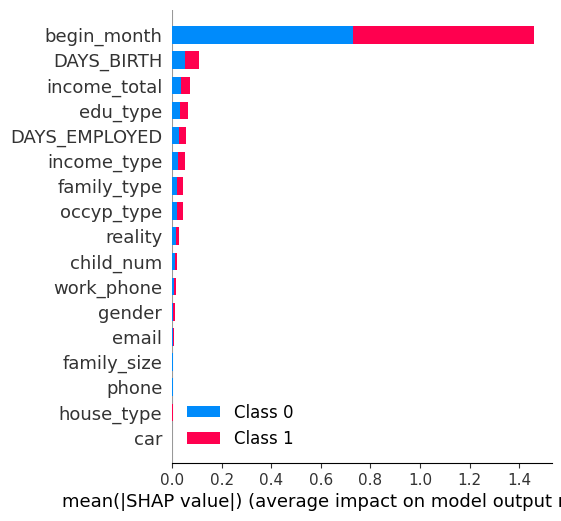

In [88]:
import shap
plt.style.use(['default'])

shap.initjs()
# ▶ LGBM shap
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar", show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

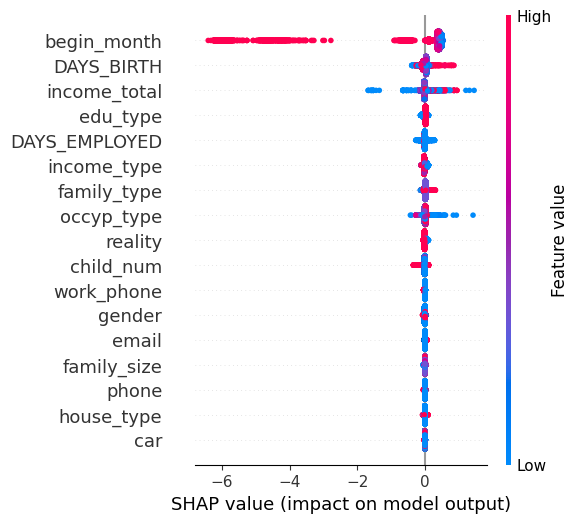

In [89]:
# ▶ LGBM shap global
shap.initjs()
shap.summary_plot(shap_values[1], x_train, show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

#begin_month 빨간색이 높은것
# 비긴먼스가 낮을수록 (파란색) : 예전에 발급받았을 수록 연체 확률이 높다 
# 비긴먼스가 높을수록 (빨간색) : 최근 발급 받은 고객은 연체율이 낮다 

In [90]:
# ▶ LGBM shap local
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][5,:] , x_train.iloc[5,:], link='logit')
# 베이스 벨류 0.6 : 우리가 가진 트레인데이터의 평균,
# 모델은 0.45로 연체율이 낮을것 같다라고 예측함
# 왜 낮게 예측했냐? 
# 비긴먼스가 -4, 가장 많이 영향을 밀어 냈음. 

In [91]:
y_pred_train_proba[5]

0.45401702211344147

In [92]:
# ▶ train target
import numpy as np

bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lift_base = y_train.value_counts(normalize=True)[1]

# ▶ bin 고정 scoring /  [ : 포함, ) : 포함X
confusion_matrix1 = pd.crosstab(pd.cut(y_pred_train_proba, bins, right=False), y_train , rownames=['Predicted'], colnames=['Actual'], margins=True)

# confusion_matrix1 = pd.crosstab(pd.qcut(y_pred_train_proba, 10), y_train , rownames=['Predicted'], colnames=['Actual'], margins=True)
confusion_matrix1['ratio']=round((pd.DataFrame(confusion_matrix1)[1]/pd.DataFrame(confusion_matrix1)['All']),2)
confusion_matrix1['Lift']=round(confusion_matrix1['ratio']/lift_base,1)
confusion_matrix1


# 구간을 나눠서. 
# 0~10% 로 예측했을 경우, 1171명이 있었고, 그중 1명만 연체로 예측
# 어느 구간까지 threshold 구하는것
# 리프트가 1 은 평균 연체율과 비슷한 그룹
# 1 보다 높은애들

Actual,0,1,All,ratio,Lift
Predicted,,,,,
"[0.0, 0.1)",1170,1,1171,0.00,0.0
"[0.1, 0.2)",7,3,10,0.30,0.5
"[0.2, 0.3)",6,3,9,0.33,0.5
"[0.3, 0.4)",56,12,68,0.18,0.3
"[0.4, 0.5)",142,94,236,0.40,0.6
"[0.5, 0.6)",318,293,611,0.48,0.7
"[0.6, 0.7)",3114,5665,8779,0.65,1.0
"[0.7, 0.8)",1827,5753,7580,0.76,1.2
"[0.8, 0.9)",2,53,55,0.96,1.5


In [93]:
# ▶ test target
# bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins=[0.0, 0.3, 0.7, 1.0]
lift_base = y_test.value_counts(normalize=True)[1]

confusion_matrix1 = pd.crosstab(pd.cut(y_pred_test_proba, bins, right=False), y_test , rownames=['Predicted'], colnames=['Actual'], margins=True)
confusion_matrix1['ratio']=round((pd.DataFrame(confusion_matrix1)[1]/pd.DataFrame(confusion_matrix1)['All']),2)
confusion_matrix1['Lift']=round(confusion_matrix1['ratio']/lift_base,1)
confusion_matrix1
#리프가 1.1이상인 애들이 연체율이 높으니, 얘네한테 마케팅

Actual,0,1,All,ratio,Lift
Predicted,,,,,
"[0.0, 0.3)",527,7,534,0.01,0.0
"[0.3, 0.7)",1463,2756,4219,0.65,1.0
"[0.7, 1.0)",857,2328,3185,0.73,1.1
All,2847,5091,7938,0.64,1.0
